In [2]:
!pip install h5py

  Using cached h5py-3.11.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.5 kB)
Using cached h5py-3.11.0-cp312-cp312-macosx_11_0_arm64.whl (2.9 MB)


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import h5py

In [20]:
positions = np.load('rblocs.npy')
flowData = h5py.File('snapshots/snapshots_s2.h5','r')
p = flowData['tasks/p']
x = flowData['scales/x/1.0']
y = flowData['scales/z/1.0']

(0.0, 1.0)

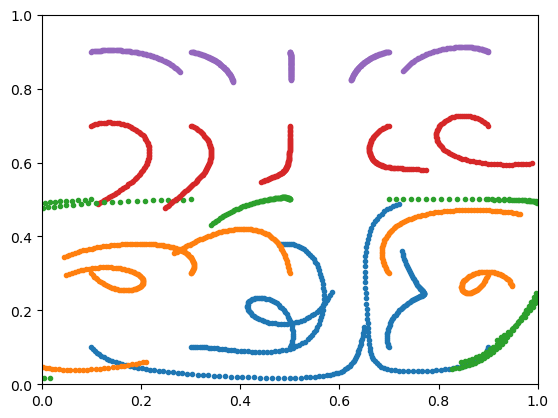

In [21]:
fig = plt.figure()
for i in range(positions.shape[0]):
    plt.plot(positions[i,:,0],positions[i,:,1],'.')
    
plt.xlim([0,1])
plt.ylim([0,1])

(100, 81, 2)


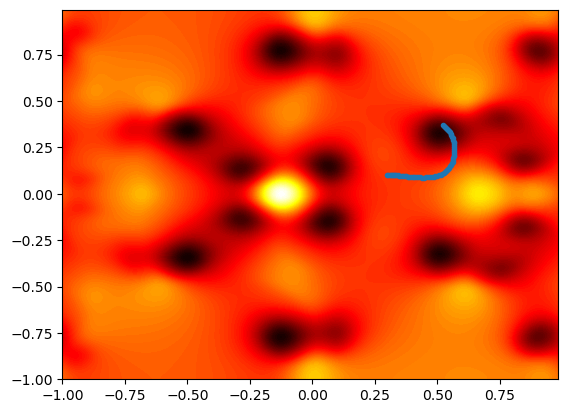

In [41]:
# Plot particle N
N = 10
fig = plt.figure()
plt.plot(positions[N,0:70,0],positions[N,0:70,1],'.')
print(positions.shape)
plt.contourf(x,y,p[-1,:,:].T,100,cmap='hot')
# plt.xlim([0,x[-1]])
# plt.ylim([0,y[-1]])

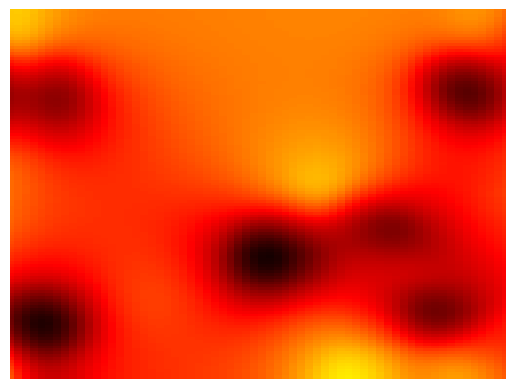

In [23]:
fig, ax = plt.subplots()
plt.axis('off')
xdata, ydata = [], []
ln, = ax.plot([], [], 'ob',markersize=5)
cont = ax.pcolormesh(x,y,p[-1,:,:].T/np.max(np.abs(p[-1,:,:])),cmap='hot')
def init():
    ax.set_xlim(0, x[-1])
    ax.set_ylim(0, y[-1])
#     ax.set_aspect('equal')
    return ln,

def update(i):
    ln.set_data(positions[:,i,0], positions[:,i,1])
    cont.set_array(p[i,:,:].T/np.max(np.abs(p[i,:,:])))
    return ln,

ani = FuncAnimation(fig, update, frames=positions.shape[1]-1,
                    init_func=init, blit=True)

In [102]:
from IPython.display import HTML
HTML(ani.to_jshtml())

IndexError: Index (30) out of range for (0-29)